In [1]:
import pandas as pd
df = pd.read_csv('cars.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [2]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [3]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


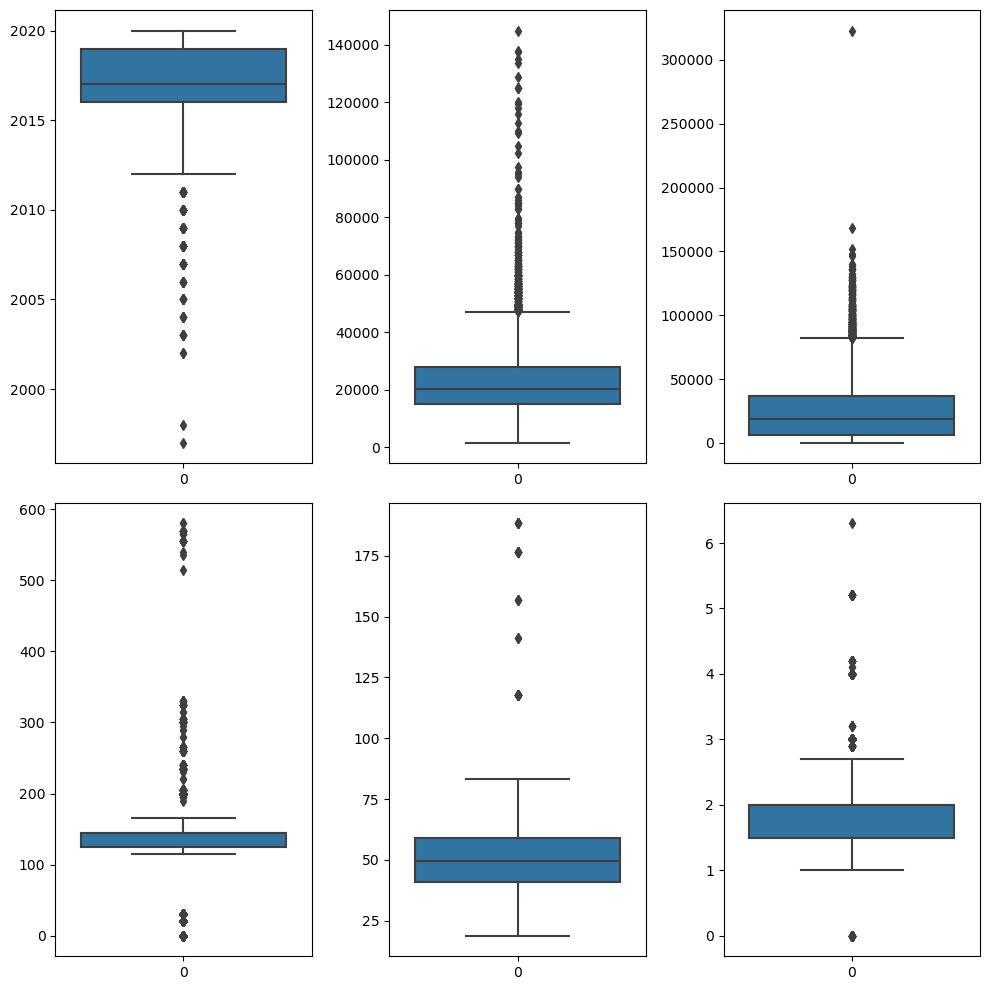

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
ax = ax.flatten()
col = df.select_dtypes(include='number').columns
index = 0
for i in range(len(col)):
    sns.boxplot(data = df[col[index]], ax = ax[i])
    index += 1
plt.tight_layout()
plt.show()

In [6]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
10,A3,2017,16100,Manual,28955,Petrol,145,58.9,1.4
11,A6,2016,16500,Automatic,52198,Diesel,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [7]:
df.reset_index(drop=True, inplace = True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
2,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
3,A3,2017,16100,Manual,28955,Petrol,145,58.9,1.4
4,A6,2016,16500,Automatic,52198,Diesel,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
6095,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
6096,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
6097,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
6098,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


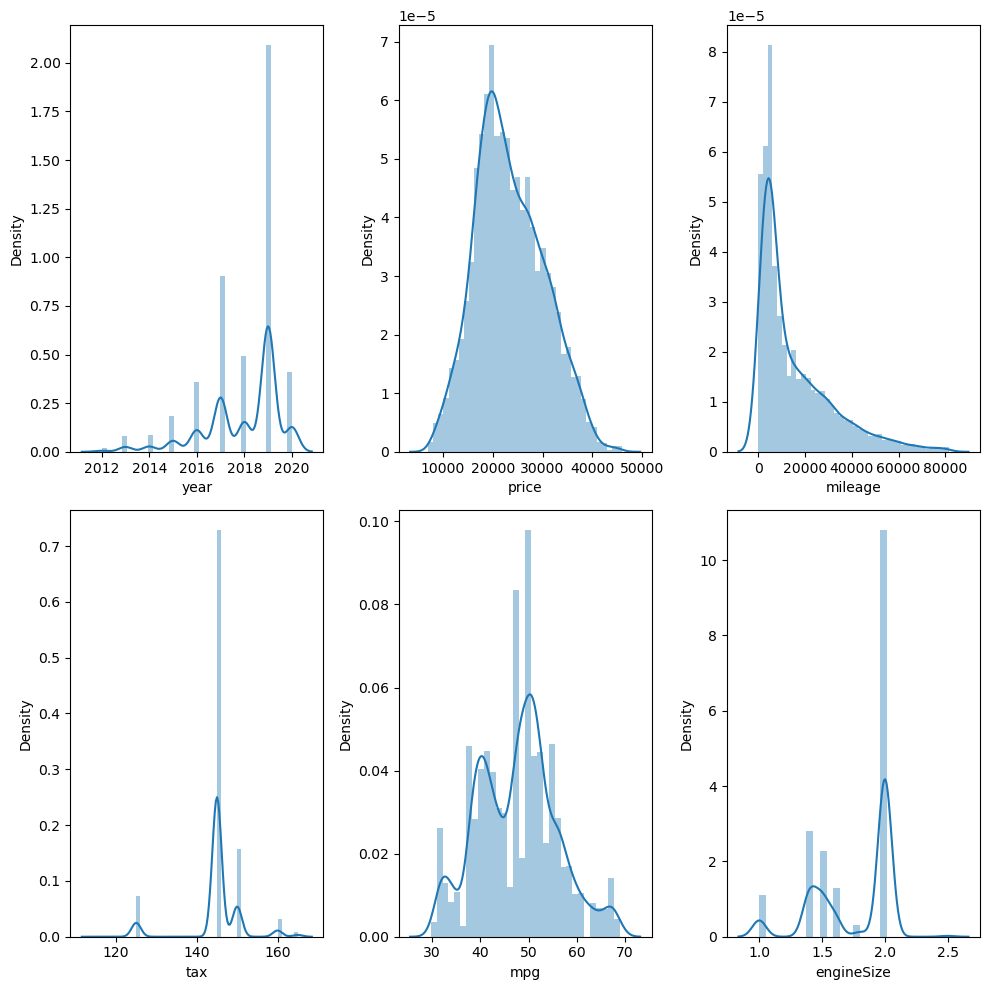

In [8]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
ax = ax.flatten()
col = df.select_dtypes(include='number').columns
index = 0
for i in range(len(col)):
    sns.distplot(a = df[col[index]], ax = ax[i])
    index += 1
plt.tight_layout()
plt.show()

In [9]:
skewness = df.select_dtypes(include='number').skew()
skewness

year         -1.166663
price         0.322360
mileage       1.518580
tax          -1.299480
mpg           0.159648
engineSize   -0.838944
dtype: float64

In [10]:
import numpy as np
for col in df.select_dtypes(include = 'number').columns:
    if skewness[col] > 1:
        df[col] = np.sqrt(df[col] + 1)
    if skewness[col] < -1:
        df[col] = df[col]**2

In [11]:
X = df.drop(columns = 'price')
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,4068289,Manual,125.443214,Petrol,22500,55.4,1.4
1,A4,4068289,Automatic,161.099348,Diesel,21025,67.3,2.0
2,A3,4076361,Manual,44.710178,Petrol,21025,49.6,1.0
3,A3,4068289,Manual,170.164626,Petrol,21025,58.9,1.4
4,A6,4064256,Automatic,228.471005,Diesel,15625,57.6,2.0
...,...,...,...,...,...,...,...,...
6095,A3,4080400,Manual,63.395583,Petrol,21025,49.6,1.0
6096,A3,4080400,Manual,44.485953,Petrol,22500,49.6,1.0
6097,A3,4080400,Manual,24.698178,Petrol,22500,49.6,1.0
6098,Q3,4068289,Automatic,92.989247,Petrol,22500,47.9,1.4


In [12]:
Y = df['price']
Y

0       12500
1       16800
2       17300
3       16100
4       16500
        ...  
6095    16999
6096    16999
6097    17199
6098    19499
6099    15999
Name: price, Length: 6100, dtype: int64

In [13]:
cols = X.select_dtypes(include='number').columns
cols

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,-0.609372,Manual,0.262381,Petrol,0.763883,0.941200,-1.141033
1,A4,-0.609372,Automatic,0.851831,Diesel,-0.024700,2.397003,0.765290
2,A3,0.644027,Manual,-1.072261,Petrol,-0.024700,0.231649,-2.411916
3,A3,-0.609372,Manual,1.001694,Petrol,-0.024700,1.369377,-1.141033
4,A6,-1.235605,Automatic,1.965589,Diesel,-2.911717,1.210340,0.765290
...,...,...,...,...,...,...,...,...
6095,A3,1.271192,Manual,-0.763362,Petrol,-0.024700,0.231649,-2.411916
6096,A3,1.271192,Manual,-1.075967,Petrol,0.763883,0.231649,-2.411916
6097,A3,1.271192,Manual,-1.403090,Petrol,0.763883,0.231649,-2.411916
6098,Q3,-0.609372,Automatic,-0.274133,Petrol,0.763883,0.023677,-1.141033


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['model'] = le.fit_transform(X['model'])
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,-0.609372,Manual,0.262381,Petrol,0.763883,0.941200,-1.141033
1,2,-0.609372,Automatic,0.851831,Diesel,-0.024700,2.397003,0.765290
2,1,0.644027,Manual,-1.072261,Petrol,-0.024700,0.231649,-2.411916
3,1,-0.609372,Manual,1.001694,Petrol,-0.024700,1.369377,-1.141033
4,4,-1.235605,Automatic,1.965589,Diesel,-2.911717,1.210340,0.765290
...,...,...,...,...,...,...,...,...
6095,1,1.271192,Manual,-0.763362,Petrol,-0.024700,0.231649,-2.411916
6096,1,1.271192,Manual,-1.075967,Petrol,0.763883,0.231649,-2.411916
6097,1,1.271192,Manual,-1.403090,Petrol,0.763883,0.231649,-2.411916
6098,7,-0.609372,Automatic,-0.274133,Petrol,0.763883,0.023677,-1.141033


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['transmission', 'fuelType'])], remainder='passthrough')
trans_arr = ct.fit_transform(X)
X = pd.DataFrame(trans_arr)
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.0,-0.609372,0.262381,0.763883,0.941200,-1.141033
1,1.0,0.0,0.0,1.0,0.0,2.0,-0.609372,0.851831,-0.024700,2.397003,0.765290
2,0.0,1.0,0.0,0.0,1.0,1.0,0.644027,-1.072261,-0.024700,0.231649,-2.411916
3,0.0,1.0,0.0,0.0,1.0,1.0,-0.609372,1.001694,-0.024700,1.369377,-1.141033
4,1.0,0.0,0.0,1.0,0.0,4.0,-1.235605,1.965589,-2.911717,1.210340,0.765290
...,...,...,...,...,...,...,...,...,...,...,...
6095,0.0,1.0,0.0,0.0,1.0,1.0,1.271192,-0.763362,-0.024700,0.231649,-2.411916
6096,0.0,1.0,0.0,0.0,1.0,1.0,1.271192,-1.075967,0.763883,0.231649,-2.411916
6097,0.0,1.0,0.0,0.0,1.0,1.0,1.271192,-1.403090,0.763883,0.231649,-2.411916
6098,1.0,0.0,0.0,0.0,1.0,7.0,-0.609372,-0.274133,0.763883,0.023677,-1.141033


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print('R2 Score: ', r2_score(Y_test, Y_pred_lr))
print('Mean Absolute Error: ', mean_absolute_error(Y_test,Y_pred_lr))

R2 Score:  0.8333404067654611
Mean Absolute Error:  2270.448360655738


In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
Y_pred_dtr = dtr.predict(X_test)
print('R2 Score: ', r2_score(Y_test, Y_pred_dtr))
print('Mean Absolute Error: ', mean_absolute_error(Y_test,Y_pred_dtr))

R2 Score:  0.8855396990993406
Mean Absolute Error:  1781.2806010928964


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
Y_pred_gbr = gbr.predict(X_test)
print('R2 Score: ', r2_score(Y_test, Y_pred_gbr))
print('Mean Absolute Error: ', mean_absolute_error(Y_test,Y_pred_gbr))

R2 Score:  0.9070475774765768
Mean Absolute Error:  1643.411972893703


In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,  
    cv=5,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    verbose=1,  
    random_state=42  
)

random_search.fit(X_train, Y_train)
best_model = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.05}


In [22]:
best_model.fit(X_train, Y_train)
Y_pred = best_model.predict(X_test)
print('R2 Score: ', r2_score(Y_test, Y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test,Y_pred))

R2 Score:  0.9327921562472063
Mean Absolute Error:  1390.9911044350658


In [23]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)